<a href="https://colab.research.google.com/github/Ela-Na/Ela_NLP/blob/main/NLP_Me1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from numpy import hstack
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Embedding
from keras import optimizers
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from scipy.ndimage.interpolation import shift

In [ ]:
path = "/content/drive/MyDrive/hw3_text_data.csv"
complain = pd.read_csv(path)

In [ ]:
complain.head()


,consumer_complaint_narrative,product
0,XXXX has claimed I owe them {$27.00} for XXXX ...,Debt collection
1,Due to inconsistencies in the amount owed that...,Consumer Loan
2,In XX/XX/XXXX my wages that I earned at my job...,Mortgage
3,I have an open and current mortgage with Chase...,Mortgage
4,XXXX was submitted XX/XX/XXXX. At the time I s...,Mortgage


In [ ]:
Y = complain['product']

Short answer: change X.iloc=[:, [0]] into X.iloc=[:, 0]

Explanation: when you set X.iloc=[:, [0]], the columns are MultiIndex object. Therefore, your X['consumer_complaint_narrative'] is a DataFrame and for DataFrame, there is no str attribute.

When you set data.columns=headerName, your X['consumer_complaint_narrative'] is a single column and you can use str attribute.

For any reason, if you need to keep your data as MultiIndex object, there is another solution: first convert your log_df['Product'] into Series. After that, str attribute is available.

products = pd.Series(df.Product.values.flatten())
include_clique = products[products.str.contains("Product A")]

In [ ]:
X = complain.iloc[: , 0].astype(str)

In [ ]:
X.astype(str).str.len().max()

3991

In [ ]:
X.dtypes

dtype('O')

In [ ]:
t = Tokenizer(num_words=10000)

In [ ]:
t.fit_on_texts(X)

In [ ]:
ohe = t.texts_to_matrix(X, mode='binary')

In [ ]:
wi = t.word_index

In [ ]:
print('Found unique tokens:', len(wi))

Found unique tokens: 6386


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(ohe, Y, test_size=0.2, random_state=22)


In [ ]:
Rf = RandomForestClassifier(max_depth=5)

In [ ]:
'''X_train = np.array(ohe)
Y_train = np.array(Y)'''

In [ ]:
Rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_pred = Rf.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5925925925925926


Tokenize the input data using word embedding of max_words as 10000 and pad
the sequences to length 200 and split 80 percent of the data for training.
i. Train a model with Embedding layer of size 32 and GRU of size 16 using
the following configurations. Train the model, find the best epoch and
report the accuracy on the test set.
Note: In the experiments use the following setting:
optimizer='rmsprop', epochs=100 , batch_size=128, validation_split=0.2
(used for validation set).

In [ ]:
Ye1 = complain['product']

In [ ]:
Ye1.nunique()

5

In [ ]:
Ye1.unique()

array(['Debt collection', 'Consumer Loan', 'Mortgage', 'Credit card',
       'Student loan'], dtype=object)

In [ ]:
Xe = complain.iloc[: , 0].astype(str)

In [ ]:
Xe.astype(str).str.len().max()

3991

In [ ]:
t = Tokenizer(num_words=10000)

In [ ]:
Xe = t.texts_to_sequences(Xe)


In [ ]:
from keras import preprocessing

Xe = preprocessing.sequence.pad_sequences(Xe, maxlen=200)

In [ ]:
# need to number classes starting with 0.

loan = {'Student loan': 0,'Debt collection': 1, 'Consumer Loan':2, 'Mortgage': 3, 'Credit card':4}
  

Ye = [loan[item] for item in Ye1]
Ye = pd.DataFrame(Ye, columns=['loan'])

Ye.head()
Ye.dtypes

loan    int64
dtype: object

In [ ]:
# another solution fot Ye

loan = ['Student loan','Debt collection', 'Consumer Loan', 'Mortgage', 'Credit card']

### map each color to an integer
mapping = {}
for x in range(len(loan)):
  mapping[loan[x]] = x

# integer representation
for x in range(len(loan)):
  loan[x] = mapping[loan[x]]

#to_categorical() takes integers as input (no strings allowed)
#to_categorical() generates dummies starting at 0 by default

Ye = to_categorical(loan)


In [ ]:
Ye = to_categorical(Ye)

In [ ]:
Ye

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split


Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, Ye, test_size=0.2, random_state=22)

In [ ]:
Xe_train.shape

(537, 200)

In [ ]:
Xe_test.shape

(135, 200)

In [ ]:
ye_train.shape

(537, 5)

In [ ]:
ye_test.shape

(135, 5)

In [ ]:
max_features = 10000

maxlen = 200

Train a model with Embedding layer of size 32 and GRU of size 16 using the following configurations. Train the model, find the best epoch and report the accuracy on the test set.


In [ ]:
from tensorflow.keras import layers


model_g = Sequential() 
model_g.add(layers.Embedding(max_features, 32, maxlen))
model_g.add(layers.GRU(16))
model_g.add(layers.Dense(5, activation='softmax')) 


In [ ]:
model_g.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc']) 

best epoch:46 validation loss:1.399 validation acc:0.417


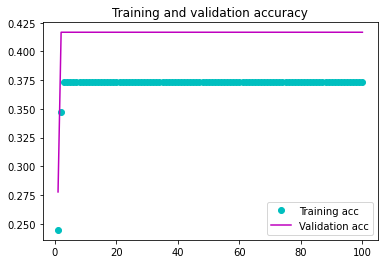

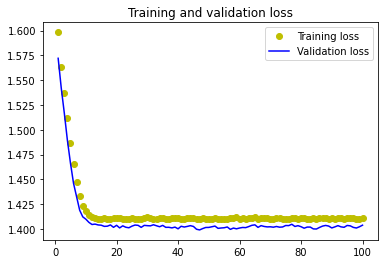

In [ ]:
history = model_g.fit(Xe_train, ye_train, epochs=100, batch_size=128, validation_split=0.2, verbose=0)
best_epoch_model = np.argmin(history.history['val_loss']) 
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model, history.history['val_loss'][best_epoch_model], history.history['val_acc'][best_epoch_model]))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'm', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'yo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend() 

In [ ]:
# save history

with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
keys = history.history.keys()
print(keys)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [ ]:
best_epoch_model = np.argmin(history.history['val_loss']) 
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model, history.history['val_loss'][best_epoch_model], history.history['val_acc'][best_epoch_model]))

best epoch:46 validation loss:1.399 validation acc:0.417


In [ ]:
model_g.evaluate(Xe_test, ye_test) 

5/5 [==============================] - 0s 26ms/step - loss: 1.3708 - acc: 0.3704


[1.370840311050415, 0.37037035822868347]

In [ ]:
y_pred = model_g.predict(Xe_test)

 Download the precomputed embeddings from
https://www.kaggle.com/danielwillgeorge/glove6b100dtxt and upload into the
drive.
i. Preprocess the embeddings to build an index that maps words (as
strings) to their vector representation (as number vectors).
ii. Build word embedding matrix (embedding_matrix) of shape (max_words,
embedding_dim): each entry i contains embedding_dim-dimensional
vector for the word of index i in the reference word index.
iii. Finally, define a deep learning model with an embedding layer and load
Glove embeddings into the model (Do not forget to freeze the layers).
Add GRU of size 16 using the following configurations. Train the model,
find the best epoch and report the accuracy on the test set.
Note: In the experiments use the following setting:
optimizer='rmsprop', epochs=10 , batch_size=128, validation_split=0.2 (used for
validation set).


In [ ]:
import os
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/glove.6B.100d.txt', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/glove')

BadZipFile: ignored

In [ ]:
import numpy as np
embeddings_index = {}
f = open('/content/drive/MyDrive/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
Yp = complain['product']

In [ ]:
# need to number classes starting with 0.

loan = {'Student loan': 0,'Debt collection': 1, 'Consumer Loan':2, 'Mortgage': 3, 'Credit card':4}
  

Yp = [loan[item] for item in Yp]
Yp = pd.DataFrame(Yp, columns=['loan'])

Yp.head()
Yp.dtypes

loan    int64
dtype: object

In [ ]:
Yp.shape

(672, 1)

In [ ]:
Yp = to_categorical(Yp)

Short answer: change X.iloc=[:, [0]] into X.iloc=[:, 0]

Explanation: when you set X.iloc=[:, [0]], the columns are MultiIndex object. Therefore, your X['consumer_complaint_narrative'] is a DataFrame and for DataFrame, there is no str attribute.

When you set data.columns=headerName, your X['consumer_complaint_narrative'] is a single column and you can use str attribute.

For any reason, if you need to keep your data as MultiIndex object, there is another solution: first convert your log_df['Product'] into Series. After that, str attribute is available.

products = pd.Series(df.Product.values.flatten())
include_clique = products[products.str.contains("Product A")]

In [ ]:
X = complain.iloc[: , 0].astype(str)

In [ ]:
X.astype(str).str.len().max()

3991

In [ ]:
max_features = 10000

maxlen = 100

In [ ]:
padding_type='post'
truncation_type='post'

In [ ]:
t = Tokenizer(num_words=10000)

In [ ]:
t.fit_on_texts(X)

In [ ]:
X = t.texts_to_sequences(X)

In [ ]:
wi = t.word_index

In [ ]:
len(wi)

6386

In [ ]:
from keras.preprocessing.sequence import pad_sequences

Xpe = pad_sequences(X,maxlen=maxlen,padding=padding_type, truncating=truncation_type)

In [ ]:
embedding_matrix = np.zeros((len(wi) + 1, maxlen))
for word, i in wi.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from sklearn.model_selection import train_test_split
Xp_train, Xp_test , yp_train, yp_test = train_test_split(Xpe, Yp , test_size = 0.20)

In [ ]:
type(yp_test)

numpy.ndarray

In [ ]:
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense, Bidirectional

embedding_layer = Embedding(input_dim=len(wi) + 1,
                            output_dim=maxlen,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False)

model_p = Sequential([
    embedding_layer,
    GRU(16),
    Dense(5, activation='softmax')])

In [ ]:
model_p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc']) 

best epoch:9 validation loss:1.464 validation acc:0.500


Text(0.5, 1.0, 'Training and validation loss')

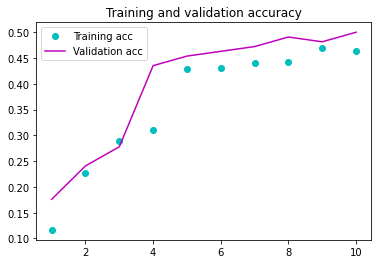

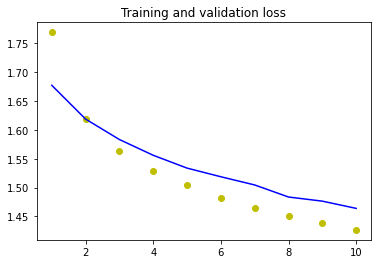

In [ ]:
history_p = model_p.fit(Xp_train, yp_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
best_epoch_model = np.argmin(history_p.history['val_loss']) 
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model, history_p.history['val_loss'][best_epoch_model], history_p.history['val_acc'][best_epoch_model]))
acc = history_p.history['acc']
val_acc = history_p.history['val_acc']
loss = history_p.history['loss'] 
val_loss = history_p.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'm', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'yo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
import pickle

In [ ]:
# save history

with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history_p.history, file_pi)

In [ ]:
keys = history_p.history.keys()
print(keys)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [ ]:
best_epoch_model = np.argmin(history_p.history['val_loss']) 
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model, history_p.history['val_loss'][best_epoch_model], history_p.history['val_acc'][best_epoch_model]))

best epoch:9 validation loss:1.464 validation acc:0.500


In [ ]:
model_p.evaluate(Xp_test, yp_test) 

5/5 [==============================] - 0s 39ms/step - loss: 1.4516 - acc: 0.4444


[1.451645016670227, 0.4444444477558136]

In [ ]:
yp_pred = model_p.predict(Xp_test)

In [ ]:
yp_pred = np.argmax(yp_pred, axis = 1)[:5] 
label = np.argmax(yp_test,axis = 1)[:5] 

print(yp_pred) 
print(label)

[3 1 1 3 3]
[3 1 0 3 1]


In [ ]:
yp_test.shape


(135, 5)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


#Confution Matrix and Classification Report
yp_pred1 = np.argmax(yp_pred, axis =1)
yp_test1 = np.argmax(yp_test, axis =1)

cm_p = confusion_matrix(yp_test1, yp_pred1)

print('Confusion Matrix')
print(cm_p)


Confusion Matrix
[[ 0  6  0  4  0]
 [ 0 30  0 28  0]
 [ 0  3  0  6  0]
 [ 0 11  0 31  0]
 [ 0  1  0 15  0]]


In [ ]:
from sklearn.metrics import confusion_matrix


FP = cm_p.sum(axis=0) - np.diag(cm_p)  
FN = cm_p.sum(axis=1) - np.diag(cm_p)
TP = np.diag(cm_p)
TN = cm_p.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('Sensitivity : ',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('Specificity : ',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('Precision : ',PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR : ',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR : ',FNR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy : ',ACC)

Sensitivity :  [0.         0.51724138 0.         0.73809524 0.        ]
Specificity :  [1.         0.72727273 1.         0.43010753 1.        ]
Precision :  [       nan 0.58823529        nan 0.36904762        nan]
FPR :  [0.         0.27272727 0.         0.56989247 0.        ]
FNR :  [1.         0.48275862 1.         0.26190476 1.        ]
Accuracy :  [0.92592593 0.63703704 0.93333333 0.52592593 0.88148148]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
print(classification_report(yp_test1, yp_pred1))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.59      0.52      0.55        58
           2       0.00      0.00      0.00         9
           3       0.37      0.74      0.49        42
           4       0.00      0.00      0.00        16

    accuracy                           0.45       135
   macro avg       0.19      0.25      0.21       135
weighted avg       0.37      0.45      0.39       135



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


model_ep = Sequential() 
model_ep.add(layers.Embedding(input_dim=len(wi) + 1,
                            output_dim=maxlen,
                            weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=False))
model_ep.add(layers.GRU(16))
model_ep.add(layers.Dense(5, activation='softmax')) 

In [ ]:
model_ep.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc']) 

best epoch:9 validation loss:1.398 validation acc:0.472


Text(0.5, 1.0, 'Training and validation loss')

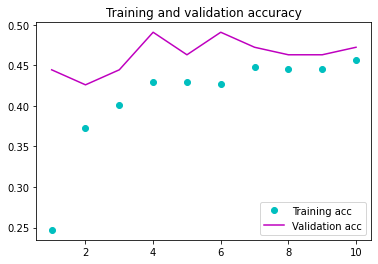

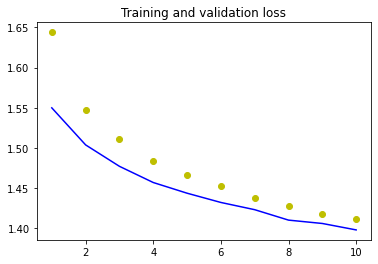

In [ ]:
history_ep = model_ep.fit(Xp_train, yp_train, epochs=10, batch_size=128, validation_split=0.2, verbose=0)
best_epoch_model = np.argmin(history_ep.history['val_loss']) 
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model, history_ep.history['val_loss'][best_epoch_model], history_ep.history['val_acc'][best_epoch_model]))
acc = history_ep.history['acc']
val_acc = history_ep.history['val_acc']
loss = history_ep.history['loss'] 
val_loss = history_ep.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'm', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'yo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
import pickle

In [ ]:
# save history

with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history_ep.history, file_pi)

In [ ]:
keys = history_ep.history.keys()
print(keys)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [ ]:
best_epoch_model = np.argmin(history_ep.history['val_loss']) 
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model, history_ep.history['val_loss'][best_epoch_model], history_ep.history['val_acc'][best_epoch_model]))

best epoch:9 validation loss:1.398 validation acc:0.472


In [ ]:
model_ep.evaluate(Xp_test, yp_test) 

5/5 [==============================] - 0s 14ms/step - loss: 1.3933 - acc: 0.4593


[1.3932971954345703, 0.4592592716217041]

In [ ]:
yep_pred = model_ep.predict(Xp_test)

In [ ]:
yep_pred = np.argmax(yep_pred, axis = 1)[:5] 
label = np.argmax(yp_test,axis = 1)[:5] 

print(yp_pred) 
print(label)

[3 1 1 3 3]
[3 1 0 3 1]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


#Confution Matrix and Classification Report
yep_pred1 = np.argmax(yep_pred, axis =1)
yp_test1 = np.argmax(yp_test, axis =1)

cm_ep = confusion_matrix(yp_test1, yep_pred1)

print('Confusion Matrix')
print(cm_ep)


Confusion Matrix
[[ 0  5  0  5  0]
 [ 0 34  0 24  0]
 [ 0  3  0  6  0]
 [ 0 15  0 27  0]
 [ 0  4  0 11  1]]


In [ ]:
from sklearn.metrics import confusion_matrix


FP = cm_ep.sum(axis=0) - np.diag(cm_ep)  
FN = cm_ep.sum(axis=1) - np.diag(cm_ep)
TP = np.diag(cm_ep)
TN = cm_ep.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('Sensitivity : ',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('Specificity : ',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('Precision : ',PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR : ',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR : ',FNR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy : ',ACC)

Sensitivity :  [0.         0.5862069  0.         0.64285714 0.0625    ]
Specificity :  [1.         0.64935065 1.         0.50537634 1.        ]
Precision :  [       nan 0.55737705        nan 0.36986301 1.        ]
FPR :  [0.         0.35064935 0.         0.49462366 0.        ]
FNR :  [1.         0.4137931  1.         0.35714286 0.9375    ]
Accuracy :  [0.92592593 0.62222222 0.93333333 0.54814815 0.88888889]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
print(classification_report(yp_test1, yep_pred1))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.56      0.59      0.57        58
           2       0.00      0.00      0.00         9
           3       0.37      0.64      0.47        42
           4       1.00      0.06      0.12        16

    accuracy                           0.46       135
   macro avg       0.39      0.26      0.23       135
weighted avg       0.47      0.46      0.41       135



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#preparing the embedding layer

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

Download and load the dataset which was collected during 60 days, this is a real
database of a brazilian logistics company. The dataset has twelve predictive attributes
and a target that is the total of orders for daily treatment.
a. Assume that we are trying to predict future urgent orders using the data
available in the "Urgent order" column. As a Naive baseline, use the actual
observations corresponding to two weeks prior as the prediction for
prediction_horizon, and find the naive baseline predictions for test samples. As a
test sample, you can consider the values corresponding to last
prediction_horizon = 7 time steps.
i. Calculate the average RMSE and MAE over the test sample.
b. Create and train a stacked GRU to predict the next 7 days urgent orders using a
look back of 14 days. Use the following specifications:
2 GRU layers with 50 and 16 hidden units and swish activation function,
optimizer=Adam, epochs=100 , batch_size=128, mse as the loss function,
validation_split=0.2 (used for validation set).
i. Calculate the average RMSE and MAE over test samples.
ii. Compare your results against Naive baseline. Is the performance better?
Why?

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Daily_Demand_Forecasting_Orders.csv to Daily_Demand_Forecasting_Orders.csv


In [ ]:
orders = pd.read_csv("Daily_Demand_Forecasting_Orders.csv", sep=';')

In [ ]:
orders.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [ ]:
base_line1 = np.array([np.nan]*(2*7*24))

In [ ]:
base_line1.shape

(336,)

In [ ]:
df_new = np.ones((2*7*24))

In [ ]:
df_new[:-200] = 428

In [ ]:
df_new

array([428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428., 428., 428., 428., 428., 428., 428., 428.,
       428., 428., 428., 428.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   

In [ ]:
base_line1 = np.append(base_line1, df_new[:-7*2*24], axis=0) 

In [ ]:
base_line1

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

In [ ]:
for i in range(10, 1,-200): 
 y_baseline = base_line1[-i*7:-(i-1)*7] 

In [ ]:
y_baseline

array([428., 428., 428., 428., 428., 428., 428.])